In [32]:
import math
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import sklearn.metrics as metrics

import matplotlib.pyplot as plt
%matplotlib inline

random_seed = 42

In [33]:
data_ws = pd.read_csv("../data/featured/winter_spring.csv", sep=';')
data_s = pd.read_csv("../data/featured/spring.csv", sep=';')

Xdata_ws = data_ws.drop('teamA_win', axis=1)
ydata_ws = data_ws.teamA_win

Xdata_s = data_s.drop('teamA_win', axis=1)
ydata_s = data_s.teamA_win

In [34]:
Xtrain_ws, Xval_ws, ytrain_ws, yval_ws = train_test_split(Xdata_ws, ydata_ws, test_size=0.4, random_state=random_seed)
Xtrain_s, Xval_s, ytrain_s, yval_s = train_test_split(Xdata_s, ydata_s, test_size=0.4, random_state=random_seed)

test_data = pd.read_csv("../data/featured/summer.csv", sep=';')
Xtest = test_data.drop('teamA_win', axis=1)
ytest = test_data.teamA_win

In [35]:
clf_ws = DecisionTreeClassifier(max_depth=15)
clf_s = DecisionTreeClassifier(max_depth=15)
clf_ws.fit(Xtrain_ws, ytrain_ws)
clf_s.fit(Xtrain_s, ytrain_s)

,criterion,'gini'
,splitter,'best'
,max_depth,15
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [36]:
print('Winter & Spring accuracy score (train): {0:.6f}'.format(metrics.accuracy_score(ytrain_ws, clf_ws.predict(Xtrain_ws))))
print('Winter & Spring accuracy score (val): {0:.6f}'.format(metrics.accuracy_score(yval_ws, clf_ws.predict(Xval_ws))))

print('\nSpring accuracy score (train): {0:.6f}'.format(metrics.accuracy_score(ytrain_s, clf_s.predict(Xtrain_s))))
print('Spring accuracy score (val): {0:.6f}'.format(metrics.accuracy_score(yval_s, clf_s.predict(Xval_s))))

Winter & Spring accuracy score (train): 0.920480
Winter & Spring accuracy score (val): 0.713161

Spring accuracy score (train): 0.973774
Spring accuracy score (val): 0.755556


In [37]:
val_acc = []
train_acc = []
depths = range(1,101)
for depth in depths:
    clf = DecisionTreeClassifier(max_depth=depth, random_state = 42)
    clf.fit(Xtrain_ws, ytrain_ws)
    train_acc.append(metrics.accuracy_score(ytrain_ws, clf.predict(Xtrain_ws)))
    val_acc.append(metrics.accuracy_score(yval_ws, clf.predict(Xval_ws)))

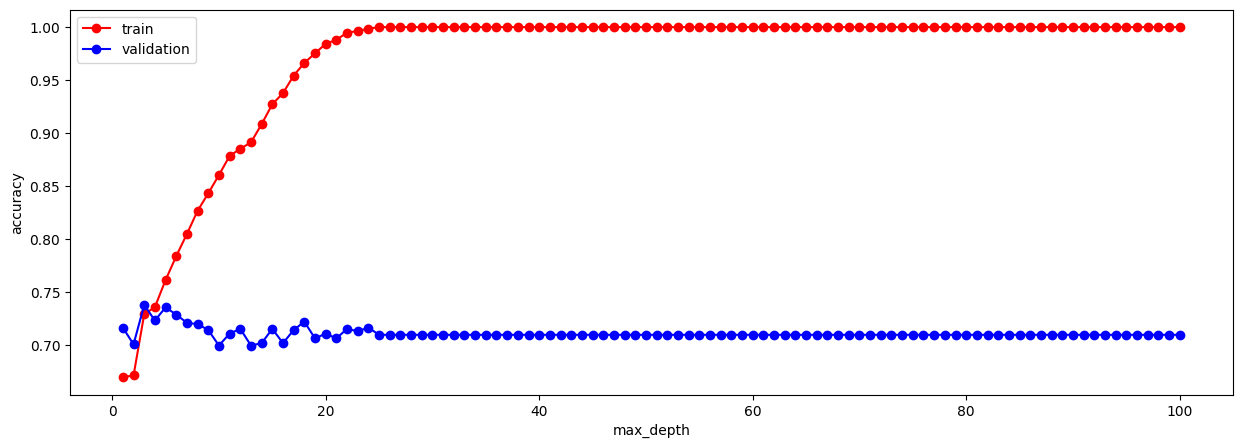

In [38]:
plt.figure(figsize=(15,5))
plt.plot(depths, train_acc,'or-') #o: body, r: barva, -: spojení bodů linkou
plt.plot(depths, val_acc,'ob-')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend(['train', 'validation'])

In [39]:
optimal_depth = np.argmax(val_acc) + 1
print(f"optimal depth: {optimal_depth}")
clf_ws = DecisionTreeClassifier(max_depth=optimal_depth, random_state = 42)
clf_ws.fit(Xtrain_ws, ytrain_ws)

print('Winter & Spring accuracy score (val): {0:.6f}'.format(metrics.accuracy_score(yval_ws, clf_ws.predict(Xval_ws))))
print('Winter & Spring accuracy score (test): {0:.6f}'.format(metrics.accuracy_score(ytest, clf_ws.predict(Xtest))))

optimal depth: 3
Winter & Spring accuracy score (val): 0.737908
Winter & Spring accuracy score (test): 0.734973


In [40]:
val_acc = []
train_acc = []
depths = range(1,101)
for depth in depths:
    clf = DecisionTreeClassifier(max_depth=depth, random_state = 42)
    clf.fit(Xtrain_s, ytrain_s)
    train_acc.append(metrics.accuracy_score(ytrain_s, clf.predict(Xtrain_s)))
    val_acc.append(metrics.accuracy_score(yval_s, clf.predict(Xval_s)))

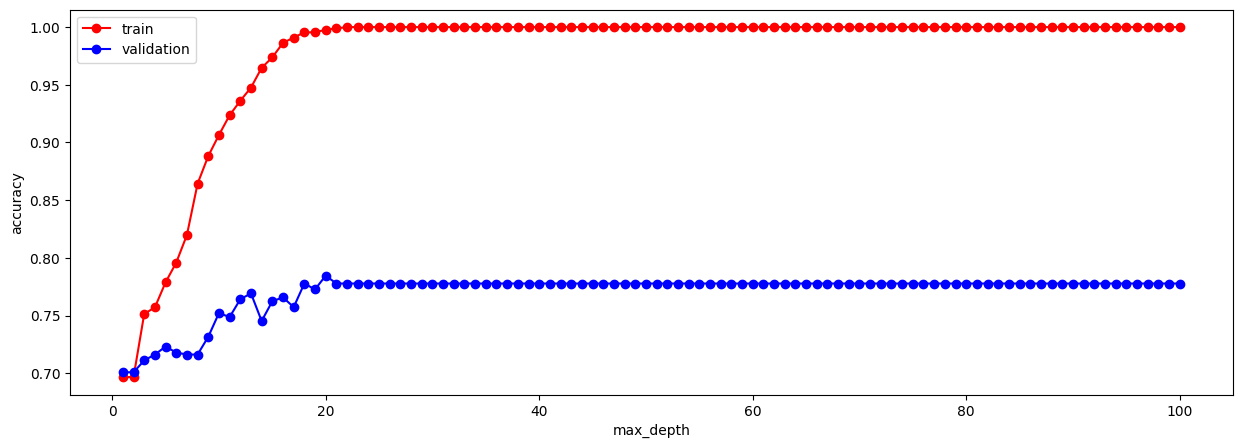

In [41]:
plt.figure(figsize=(15,5))
plt.plot(depths, train_acc,'or-') #o: body, r: barva, -: spojení bodů linkou
plt.plot(depths, val_acc,'ob-')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend(['train', 'validation'])

In [42]:
optimal_depth = np.argmax(val_acc) + 1
print(f"optimal depth: {optimal_depth}")
clf_s = DecisionTreeClassifier(max_depth=optimal_depth, random_state = 42)
clf_s.fit(Xtrain_s, ytrain_s)

print('Spring accuracy score (val): {0:.6f}'.format(metrics.accuracy_score(yval_s, clf_s.predict(Xval_s))))
print('Spring accuracy score (test): {0:.6f}'.format(metrics.accuracy_score(ytest, clf_s.predict(Xtest))))

optimal depth: 20
Spring accuracy score (val): 0.784615
Spring accuracy score (test): 0.683060
